# Part B - Applications

**Note: Your code/analysis should be self-explanatory with necessary comments.**

**You should prepare a tutorial for this part. Your tutorial should include the following:**

- **Loading the dataset and setting up the dependent variable**
- **Writing the code for each classification method**
- **Printing the output and interpreting the results**
- **Summarizing the findings and discussing the pros and cons of each method**

**Load the "penguins" dataset in seaborn**

In [63]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df = sns.load_dataset('penguins')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [6]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [7]:
# I don't think there are any good ways to substitute the missing values, so I'm just going to drop them
df = df.dropna()

In [8]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df['sex'])
df['sex'] = encoder.transform(df['sex'])

In [9]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,1
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,0


# Question 1

**Cluster the dataset using K-means. For each K, develop your hypothesis first, then verify if your hypothesis is correct.**

I assume that the "species" column can act as the label (and clustering uses unlabelled data). And there are three unique species, so that's the reason why I'm initially going to choose a k value of 3. (And see if it can cluster data into the three species.)

## Test1

First, I want to test the clustering results if I take out the label "species" AND the highly correlated "island" column. 

In [10]:
data = df.drop(columns=['species','island'])
label = df[['species']]

In [11]:
kmeans_model = KMeans(n_clusters=3,random_state=123).fit(data)

In [12]:
pd.DataFrame(kmeans_model.predict(data),index=data.index).head()

,0
0,0
1,0
2,0
4,0
5,0


In [13]:
pd.concat([label,pd.DataFrame(kmeans_model.predict(data),index=data.index)],axis=1).head(10)

,species,0
0,Adelie,0
1,Adelie,0
2,Adelie,0
4,Adelie,0
5,Adelie,0
6,Adelie,0
7,Adelie,2
12,Adelie,0
13,Adelie,0
14,Adelie,2


Even just looking at the first 10 columns, It doesn't appear that it (always) clustered by species (even if "Adelie" = cluster 0, there are some that made it to cluster 2 as well.)

## Test2

I'm going to test clustering using the same data except including the 'island' column. (Which I need to encode because Python can only work with numerical data"

In [14]:
df2 = df.copy()

In [15]:
df2

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,1
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,0


In [16]:
encoder2 = LabelEncoder()
encoder2.fit(df2['island'])
df2['island'] = encoder2.transform(df2['island'])

In [17]:
df2['island'].unique()

array([2, 0, 1])

In [18]:
data2 = df2.drop(columns=['species'])
label2 = df2[['species']]

In [19]:
kmeans_model2 = KMeans(n_clusters=3,random_state=123).fit(data2)

In [20]:
pd.concat([label2,pd.DataFrame(kmeans_model2.predict(data2),index=data2.index)],axis=1)

,species,0
0,Adelie,0
1,Adelie,0
2,Adelie,0
4,Adelie,0
5,Adelie,0
...,...,...
338,Gentoo,2
340,Gentoo,2
341,Gentoo,1
342,Gentoo,1


There's a method by pandas to check if two data frames are identical to each other.  (`pd.DataFrame.equals()`)

In [21]:
#clustering model w/o "island" column as data
pred1 = pd.DataFrame(kmeans_model.predict(data),index=data.index)
#clustering model w/ "island" columns as data
pred2 = pd.DataFrame(kmeans_model2.predict(data2),index=data2.index)

# check if clusters made each way are identical
pred1.equals(pred2)

True

Ok, they cluster them the exact same way if I include the "island" column or not. 

(I just realized this may have been something I realized after PCA analysis also.)

In [22]:
# create a single dataframe that compares the actual species label with clusters by the clustering model
compare_results = pd.concat([label2,pred2],axis=1)
compare_results.head(10)

,species,0
0,Adelie,0
1,Adelie,0
2,Adelie,0
4,Adelie,0
5,Adelie,0
6,Adelie,0
7,Adelie,2
12,Adelie,0
13,Adelie,0
14,Adelie,2


In [23]:
# cluster results in respect to Adelie species
adelie = compare_results[compare_results['species']=='Adelie']
adelie.iloc[:,1].value_counts()

0    108
2     38
Name: 0, dtype: int64

In [24]:
# cluster results in respect to Chinstrp species
chinstrap = compare_results[compare_results['species']=='Chinstrap']
chinstrap.iloc[:,1].value_counts()

0    52
2    16
Name: 0, dtype: int64

In [25]:
# cluster results in respect to Gentoo species
gentoo = compare_results[compare_results['species']=='Gentoo']
gentoo.iloc[:,1].value_counts()

1    70
2    48
0     1
Name: 0, dtype: int64

The above shows the cluster results of each row that are associated with each unique species in the data. And apparently, the K-means clustered them in a way that each species are at least in cluster 0 or 2. And cluster 1 only consists of the Gentoo species, but some of Gentoo is clustered into clusters 0 and 2 also. 

I didn't evaluate different values of k for time's sake and because I want to be able to compare to the labels, but I do know ways to evaluate the "performance" of trying different values for k. Some methods include the silhouette method and the elbow method. They evaluate clusters by minimizing the distance between points within a cluster and maximizing the distance between clusters. The silhouette method gives an actual "score" based on metrics of those goals, while the elbow method is a visual way to find the potential optimal number of clusters. So I skipped going through that to finish more of this assignment as soon as possible, but I did want to mention that I know how to utilize those. 

# Question 2

**Cluster the dataset using a hierarchical method.**

In [53]:
hierclust = AgglomerativeClustering()
hierclust.fit_predict(data2)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Well, this looks familiar... Apparently Agglomerative clustering can also set the number of clusters, so I wonder if set `n_clusters` (k) to 3 I will get something similar to k-means

In [54]:
hierclust2 = AgglomerativeClustering(n_clusters=3)
hierclust2.fit_predict(data2)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 0, 1, 2, 1, 2, 1, 0, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0,
       1, 2, 1, 2, 1, 2, 2, 0, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 0, 2, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Hmm... I guess not. 

In K means only two cluster types were found in the "Adelie" and "chinstrap" species (which were about the first two-thirds of the), but we can see there are some of all three clusters mixed around the data. So I guess it didn't do the EXACT same thing. But on the other hand, it's pretty similar, so all clustering models so far are noticing something pretty consistently.

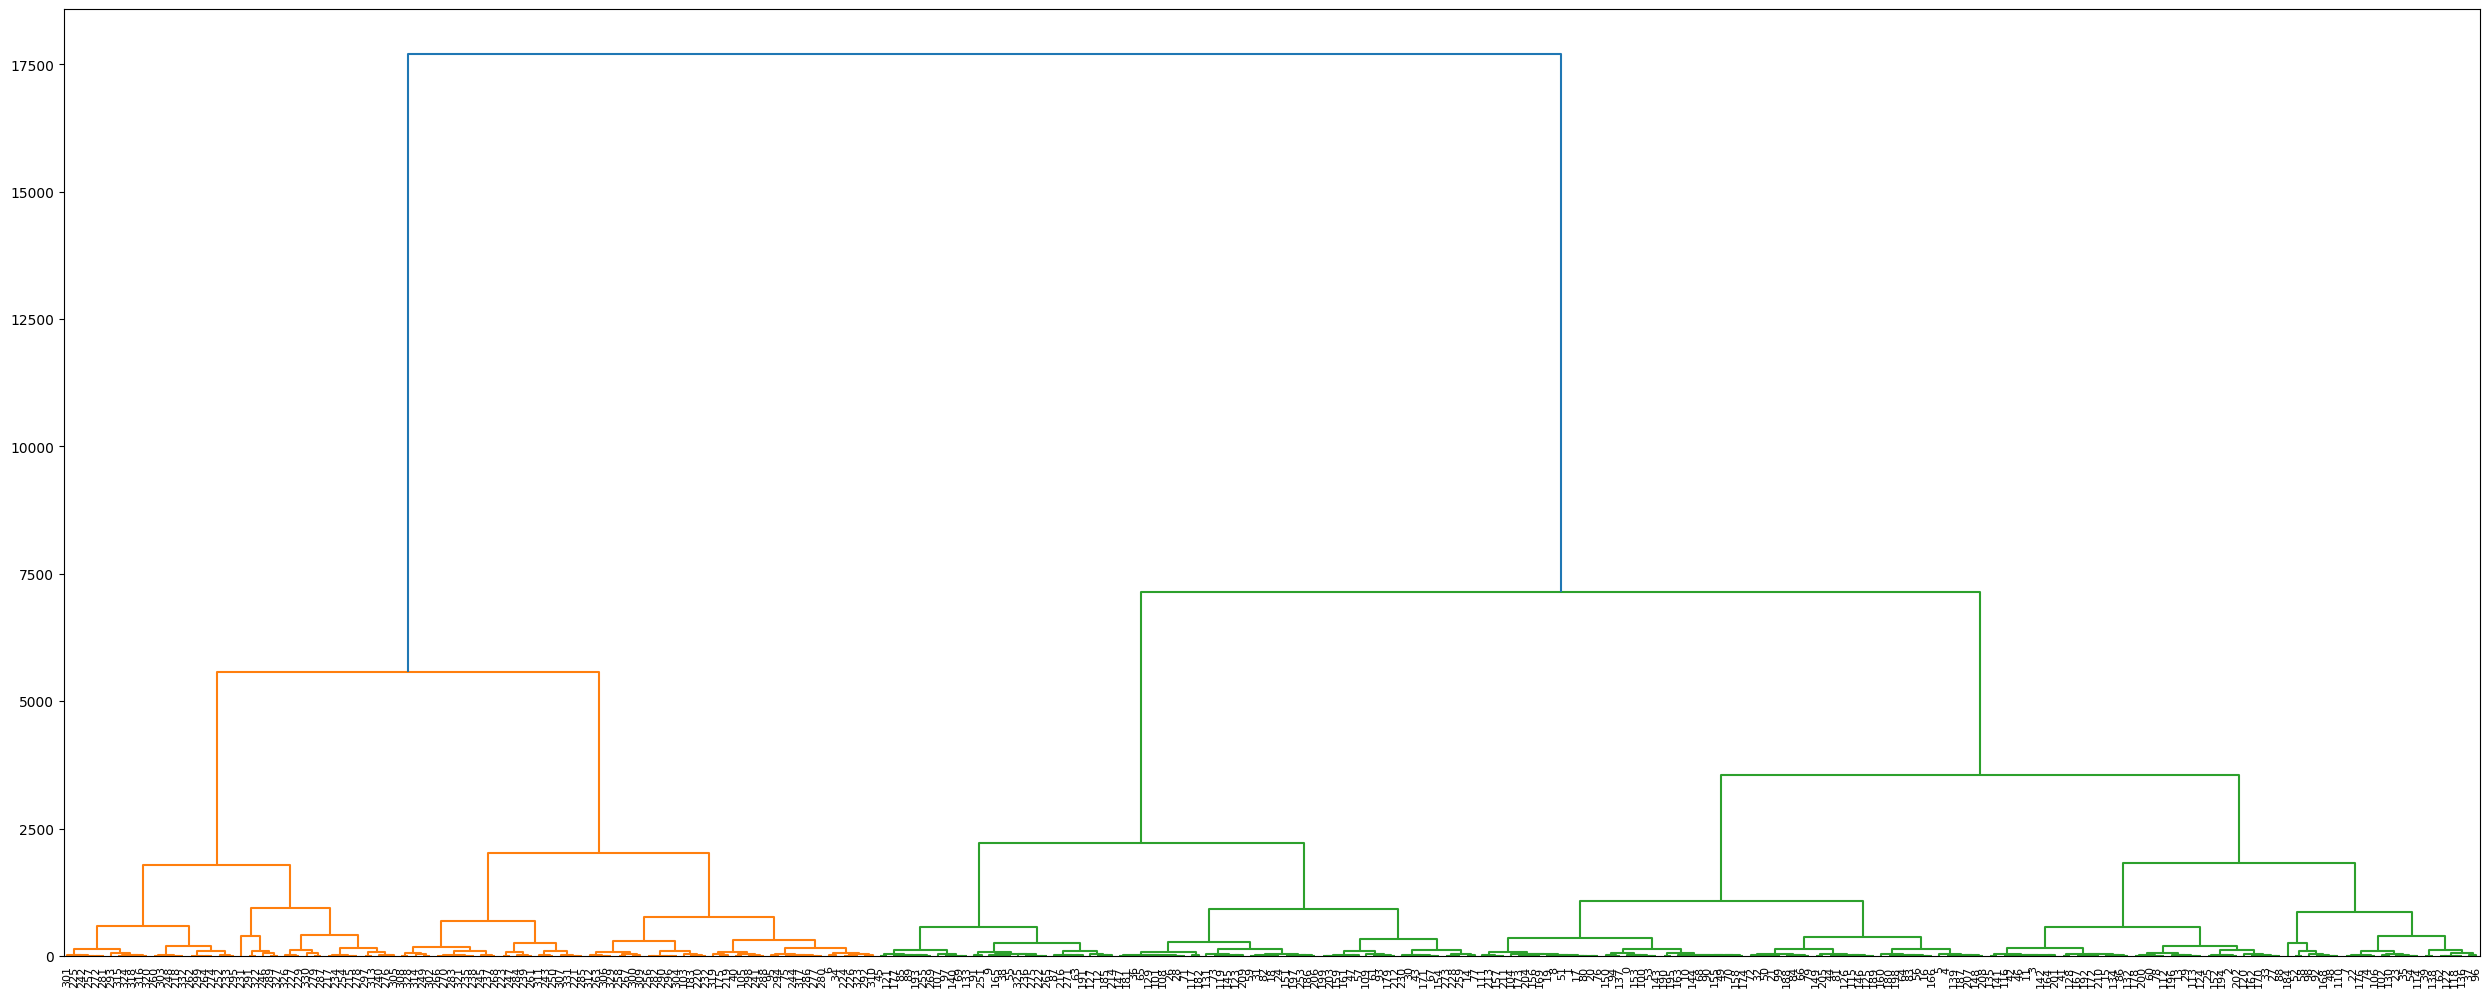

In [52]:
plt.figure(figsize=(25,10))
linkage_data = linkage(data2, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.tight_layout()
plt.xticks(rotation=90,fontsize=8)
plt.show()

I tried to make a dendrogram (since they are pretty cool visualizations of hierarchical clustering), but I couldn't quite find a way to make this dendrogram legible. (So far, I've made more successful dendrograms in R than in Python.)

# Question 3

**Cluster the dataset using DBSCAN with appropriate hyperparameters.**

# Question 4 (optional)

**Cluster the dataset using a Grid-based method (you can define your own grid)**

# Question 5 (optional)

**Search and learn one Evaluation criterion for clustering analysis, and apply it in your analysis.**

# Question 6 (optional)

**Conduct a clustering analysis for "Facebook Live Sellers in Thailand Data Set"**

# Question 7 

**Use PCA analysis to extract the most important two features for classification or regression. Compare your result before and after PCA**

## Before PCA

In [61]:
X = data2.copy()
y = label2.copy()

In [57]:
X.shape

(333, 6)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [68]:
from sklearn.tree import DecisionTreeClassifier

#instatiate the model
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train,y_train)
#test model
dt_classifier.score(X_test,y_test)

0.9552238805970149

## After PCA

In [59]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca.shape

(333, 2)

In [60]:
X_pca

array([[-4.57325539e+02,  1.33732119e+01],
       [-4.07252943e+02,  9.18655137e+00],
       [-9.57045327e+02, -8.15155935e+00],
       [-7.57116485e+02, -1.85993142e+00],
       [-5.57177753e+02,  3.41232768e+00],
       [-5.82310030e+02,  1.13794320e+01],
       [ 4.67771585e+02,  1.47498771e+01],
       [-1.00723298e+03,  3.03721973e+00],
       [-4.07184695e+02,  5.10195194e+00],
       [ 1.92831200e+02,  9.19512665e+00],
       [-5.07267780e+02,  9.51801506e+00],
       [-7.57077743e+02, -4.41078010e+00],
       [ 2.92835664e+02,  9.15588441e+00],
       [-8.82245869e+02,  5.32147706e+00],
       [-7.15954753e+00,  6.22451134e+00],
       [-8.07392416e+02,  1.48148929e+01],
       [-6.07326703e+02,  1.23789877e+01],
       [-4.07222856e+02,  7.63456542e+00],
       [-2.57291535e+02,  1.29510532e+01],
       [-4.07345424e+02,  1.50409188e+01],
       [-4.07255300e+02,  9.68665644e+00],
       [-6.57263181e+02,  7.82924209e+00],
       [-1.00715876e+03, -1.48905924e+00],
       [-1.

In [64]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [69]:
#instatiate the model
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_pca,y_train)
#test model
dt_classifier.score(X_test_pca,y_test)

0.7611940298507462

Accuracy actually went down in this case (this case = using a decision tree classifier). 

# Question 8 

**Use PCA analysis to extract features that represent 80% variance for classification or regression. Compare your result before and after using PCA.**

In [70]:
pca2 = PCA(0.80)
X_pca2 = pca2.fit_transform(X)
X_pca2.shape

(333, 1)

In [71]:
X_train_pca2, X_test_pca2, y_train2, y_test2 = train_test_split(X_pca2, y, test_size=0.2, random_state=30)

In [72]:
#instatiate the model
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_pca2,y_train2)
#test model
dt_classifier.score(X_test_pca2,y_test2)

0.6417910447761194

This PCA accuracy went down even more than the last one. (I think, in this case, reducing dimensions will do more harm than good.)

# Question 9

**Summarize your findings**

> New Note: I duplicated the notebook and tried everything after scaling the data. (I named the notebook "JasmineKobayashiA07PartB-version2.pdf") I think there some more interesting results there. (I'm pointing this out because I didn't have time to make that notebook itself entirely self-explanatory (and kinda references back to these results).